In [1]:
from fonctions_FMM_v5 import *

Liste people : chaque individu est défini par 5 paramètres et il correspond à un tuple de la liste people (autrement dit son numéro est égal à l'indice du tuple dans people)

un individu = (ic, jc, R, vi, vj)

- ic : indice de la ligne où se situe le centre de l'individu
- jc : indice de la colonne où se situe le centre de l'individu
- R : rayon de l'individu
- vi : composante verticale de la vitesse de l'individu (comment il change de ligne)
- vj : composante horizontale de la vitesse de l'individu (comment il change de colonne)


In [2]:
#Conditions initiales
people = [ (0,5,1,1,0) , (18,5,2,-1,0) , (9,14,2,0,-1) ]
shape = (20,20)
ind = 2  #on choisit l'individu dont on veut étudier la trajectoire 
G = makeGrid(shape, ind, people)

#paramètres
h=1
f=0.2
dt=1

In [3]:
A = fastMarching(G, ind, people, h, f, dt)

In [4]:
grid = A[0]
F_tab = A[1]

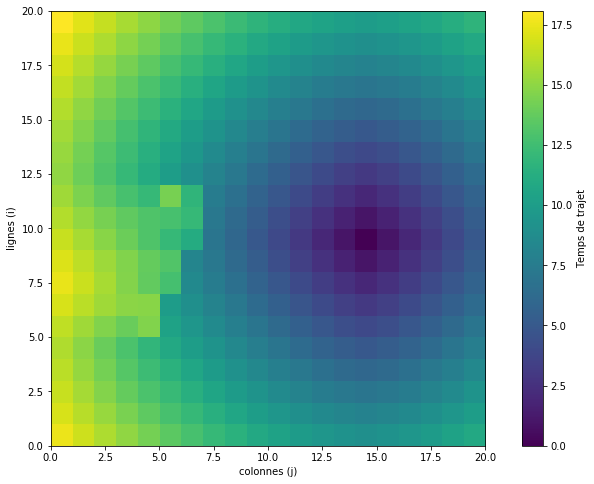

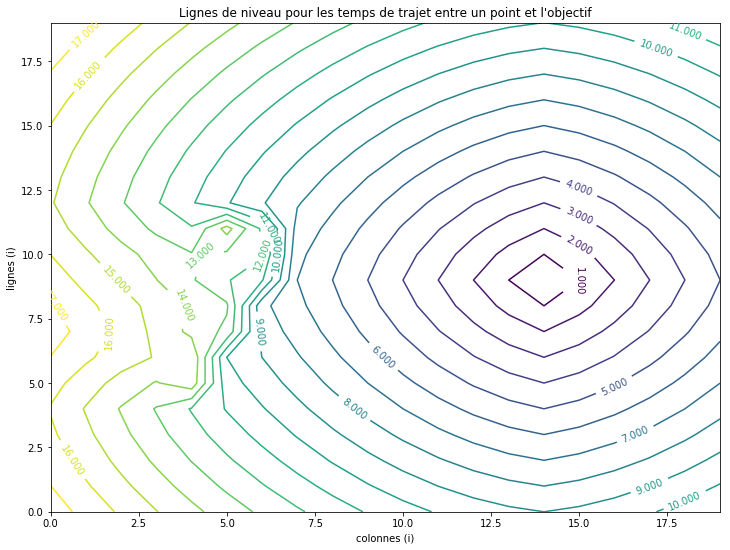

In [5]:
Graphes(grid)

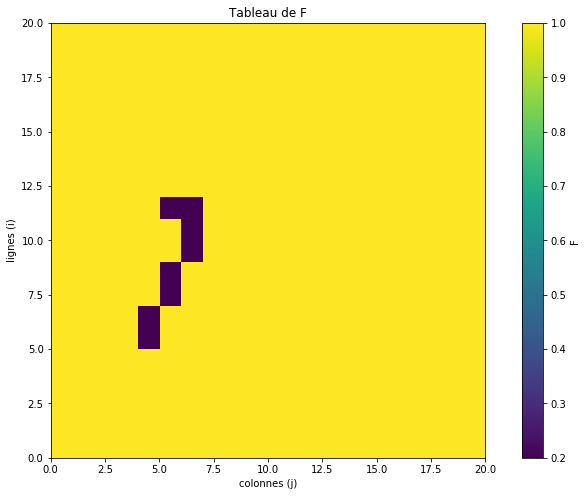

In [6]:
fig = plt.figure( figsize = (13, 8) )
im = plt.imshow( F_tab, origin='lower', extent=[0, F_tab.shape[0], 0, F_tab.shape[1]])
plt.xlabel('colonnes (j)')
plt.ylabel('lignes (i)')
plt.title("Tableau de F")
c = fig.colorbar(im)
c.set_label('F')
#plt.savefig('tableauF.png', bbox_inches='tight')

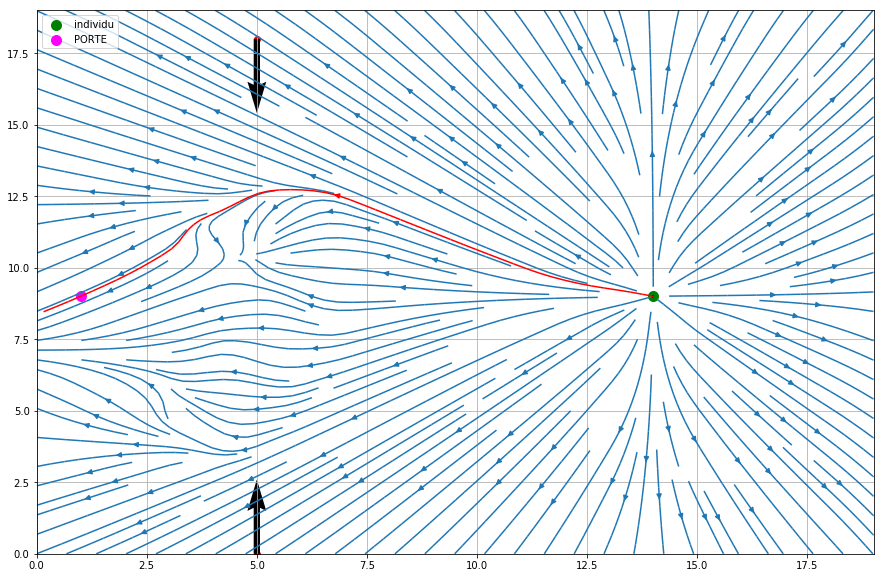

In [7]:
#Streamline

vx = np.gradient(grid)[0]
vy = np.gradient(grid)[1]
x = np.arange(20)
y = x

start = [[1,9]]   #porte à atteindre 

fig = plt.figure( figsize = (15, 10) )
ax = plt.axes()

for n in range(len(people)):
    if n != ind:
        individu = people[n]  
        ic, jc, R, vi, vj = individu[0], individu[1], individu[2], individu[3], individu[4]
        plt.scatter(jc,ic, color='r')
        ax.quiver(jc, ic, vj, vi,units='xy' ,scale=0.5)
    else:
        individu = people[n]  
        ic, jc = individu[0], individu[1]
        plt.scatter(jc, ic, s=100, marker='o', color='g', label='individu')

        
plt.xlim(0,19)
plt.ylim(0,19)
plt.scatter(start[0][0], start[0][1], s=100, marker='o', color='magenta', label='PORTE')
plt.streamplot(x, y, vy, vx, density=2)
plt.streamplot(x, y, vy, vx, density=2, linewidth=None, color='r', start_points=start)
plt.legend()
plt.grid()
plt.show()